# Big Data Analytics Projekt: Online-Marketing

In diesem Projekt geht es um Daten aus dem Bereich Online-Marketing. Auf Websites werden Werbebanner geschaltet, die Besucher auf Produktseiten locken sollen. Diese Werbung kostet Geld und deshalb ist es wichtig für die Unternehmen,  die auf diesem Weg Marketing betreiben wollen, den Erfolg dieser Werbemaßnahmen einschätzen zu können. Es bieten sich eine Reihe von Metriken an, um eine solche Bewertung vorzunehmen. Die "Click-Through-Rate" (CTR) misst zunächst einmal schlicht, wie oft auf eine Werbung geklickt wurde relativ zur Geamtzahl der "Ad Impressions". Die "Conversion Rate" geht einen Schritt weiter und bezieht dann noch ein, wie oft ein Klick zu einem tatsächlichen Kauf geführt hat.<br>
Der zu bearbeitende Datensatz, den Sie im Datenaustausch-Ordner finden ("advertising.csv"), enthält verschiedene Nutzerdaten und als entscheidendes Label die Spalte "Click on Ad", die uns sagt, ob ein Besucher auf eine Werbung geklickt hat (1) oder nicht (0).

Der Datensatz beinhaltet folgende Eigenschaften:

* 'Daily Time Spent on Site': Zeit auf der Website in Minuten
* 'Age': Alter in Jahren
* 'Area Income': Durchschnittliches Einkommen der Region des Nutzers
* 'Daily Internet Usage': Durchschnittliche Minutenzahl, die der Nutzer täglich im Internet verbringt
* 'Ad Topic Line': Überschrift der Werbung
* 'City': Stadt des Nutzers
* 'Male': Ob der Nutzer männlich ist (1) oder nicht (0)
* 'Country': Land des Nutzers
* 'Timestamp': Zeit, zu der der Nutzer auf die Werbung geklickt oder das Fenster geschlossen hat
* 'Clicked on Ad': Ob der Nutzer gelickt hat (1) oder nicht (0)

### Ausgangslage

Sie sind ein(e) Unternehmensberater(in) , der von einem Kunden beauftragt wurde, auf Basis der vorliegenden Daten aus dem Online-Marketing eine Analyse durchzuführen, um den Erfolg von Werbebannern dieser Firma einzuschätzen. Der Auftraggeber möchte wissen, welche Merkmale seiner potenziellen Kunden eine Rolle spielen und welche Merkmalsausprägungen zu Clicks führen. Am Ende wünscht er natürlich auch eine Beratung, wie er in Zukunft vorgehen soll.

### Aufgabenstellung

Sie sollen anhand der vorliegenden Daten zu Nutzereigenschaften eine Klassifikation (__logistische Regression__) vornehmen, sodass Sie für zukünftige Nutzer vorhersagen können, ob der betreffende Nutzer klicken wird oder nicht. Auf der Basis könnte man dann Veränderungen an der Werbemaßnahme vornehmen und sie auf die Besucher zuschneiden.<br>
Sie führen zunächst eine Exploration der Daten durch und verschaffen sich einen Überblick, ob die notwendige Datenqualität gegeben ist. An dieser Stelle wären dann geeignete Änderungen (Dummy-Codierung o.ä.) vorzunehmen. Sie visualisieren die Daten, um Beziehungen zwischen den Merkmalen einschätzen zu können. Darauf bereiten Sie Ihre Daten für das Training des Klassifikationsmodells vor (Trainings- und Testdaten, keine CV!). Eine Standardisierung müssen Sie nicht vornehmen. Das Modell wird trainiert und auf die Testdaten angewendet. Validieren Sie das Modell mit einem Klassifikationsreport und formulieren Sie die von Ihnen im Laufe der Untersuchung gewonnen Erkenntnisse. Machen Sie ggf. Vorschläge, was das Unternehmen für die Zukunft verbessern kann.<br>

### Importe

Nehmen Sie hier typische Importe vor oder bündeln Sie hier gerne auch alle notwendigen Importe für dieses Notebook.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as logit
from sklearn.metrics import accuracy_score, classification_report

from plot_classifier import plot_classifier as pc

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

ModuleNotFoundError: No module named 'plot_classifier'

### Datensatz laden

#### Aufgabe

Lesen Sie die advertising.csv in ein DataFrame ein, das Sie bitte geeignet bezeichnen.

In [11]:
visitors = pd.read_csv('Advertising.csv')

#### Aufgabe

Lassen Sie sich den Kopf des DataFrames anzeigen.

In [12]:
visitors.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

Verschaffen Sie sich einen Überblick über die Missing Values.

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


Verschaffen Sie sich einen Überblick über Datentypen, Skalenniveaus und typische Werte der Merkmalsausprägungen mit deskriptiver Statistik.

In [14]:
visitors.describe(include='all')

Daily Time Spent on Site          Age   Area Income  \
count                1000.000000  1000.000000   1000.000000   
unique                       NaN          NaN           NaN   
top                          NaN          NaN           NaN   
freq                         NaN          NaN           NaN   
mean                   65.000200    36.009000  55000.000080   
std                    15.853615     8.785562  13414.634022   
min                    32.600000    19.000000  13996.500000   
25%                    51.360000    29.000000  47031.802500   
50%                    68.215000    35.000000  57012.300000   
75%                    78.547500    42.000000  65470.635000   
max                    91.430000    61.000000  79484.800000   

        Daily Internet Usage                         Ad Topic Line  \
count            1000.000000                                  1000   
unique                   NaN                                  1000   
top                      NaN  Centralized systematic knowledgebase   
freq                     NaN                                     1   
mean              180.000100                                   NaN   
std                43.902339                                   NaN   
min               104.780000                                   NaN   
25%               138.830000                                   NaN   
50%               183.130000                                   NaN   
75%               218.792500                                   NaN   
max               269.960000                                   NaN   

                City         Male         Country            Timestamp  \
count           1000  1000.000000            1000                 1000   
unique           969          NaN             237                 1000   
top     Williamsport          NaN  Czech Republic  2016-01-16 11:35:01   
freq               3          NaN               9                    1   
mean             NaN     0.481000             NaN                  NaN   
std              NaN     0.499889             NaN                  NaN   
min              NaN     0.000000             NaN                  NaN   
25%              NaN     0.000000             NaN                  NaN   
50%              NaN     0.000000             NaN                  NaN   
75%              NaN     1.000000             NaN                  NaN   
max              NaN     1.000000             NaN                  NaN   

        Clicked on Ad  
count      1000.00000  
unique            NaN  
top               NaN  
freq              NaN  
mean          0.50000  
std           0.50025  
min           0.00000  
25%           0.00000  
50%           0.50000  
75%           1.00000  
max           1.00000

In [15]:
visitors['Male'].unique()

array([0, 1], dtype=int64)

In [16]:
visitors['Clicked on Ad'].unique()

array([0, 1], dtype=int64)

In [17]:
visitors['Ad Topic Line'].nunique()

1000

In [18]:
visitors['City'].nunique()

969

In [19]:
visitors['Country'].nunique()

237

In [20]:
visitors['year_of_birth'] = pd.to_datetime(visitors['Timestamp']).dt.year - visitors['Age']

visitors.loc[visitors['year_of_birth'].between(1984, 2000), 'Generation'] = 'Millenials'
visitors.loc[visitors['year_of_birth'].between(1965, 1983), 'Generation'] = 'X'
visitors.loc[visitors['year_of_birth'].between(1945, 1964), 'Generation'] = 'Baby Boomer'

visitors.drop(['year_of_birth'], axis=1, inplace=True)

In [21]:
visitors['Generation'].value_counts()

X              539
Millenials     401
Baby Boomer     60
Name: Generation, dtype: int64

In [22]:
##Aufteilung der Generationen in Dummies:
##visitors = pd.get_dummies(visitors, columns=['Generation'], drop_first = True)

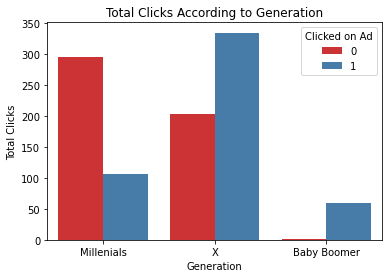

In [23]:
ax = sns.countplot(x='Generation', hue='Clicked on Ad', palette='Set1', data=visitors, order=['Millenials', 'X', 'Baby Boomer'])
ax.set(title='Total Clicks According to Generation', xlabel='Generation', ylabel='Total Clicks')
plt.show()

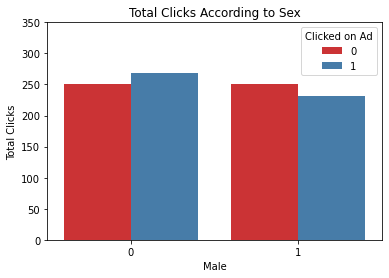

In [24]:
ax = sns.countplot(x='Male', hue='Clicked on Ad', palette='Set1', data=visitors)
ax.set(title='Total Clicks According to Sex', xlabel='Male', ylabel='Total Clicks')
plt.ylim(0,350)
plt.show()

## Timestamp Untersuchung

In [25]:
visitors_time = pd.DataFrame()
visitors_time['hour'] = pd.to_datetime(visitors['Timestamp']).dt.hour
visitors_time['weekday'] = pd.to_datetime(visitors['Timestamp']).dt.dayofweek
visitors_time['Clicked on Ad'] = visitors['Clicked on Ad']

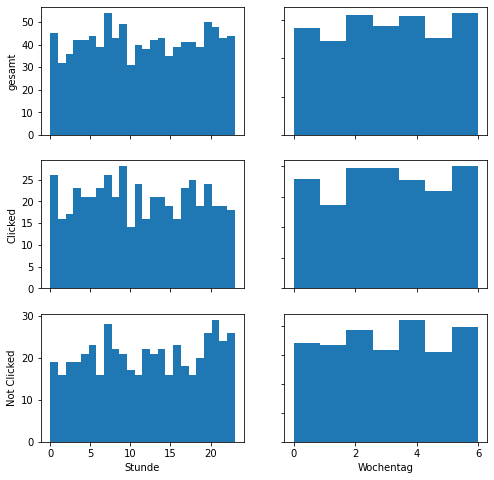

In [26]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(8,8))

ax1.hist(visitors_time['hour'], bins=24);
ax2.hist(visitors_time['weekday'], bins=7);
ax3.hist(visitors_time.loc[visitors_time['Clicked on Ad'] == 1]['hour'], bins=24);
ax4.hist(visitors_time.loc[visitors_time['Clicked on Ad'] == 1]['weekday'], bins=7);
ax5.hist(visitors_time.loc[visitors_time['Clicked on Ad'] == 0]['hour'], bins=24);
ax6.hist(visitors_time.loc[visitors_time['Clicked on Ad'] == 0]['weekday'], bins=7);

for ax in fig.get_axes():
    ax.label_outer()

ax1.set(ylabel='gesamt')
ax3.set(ylabel='Clicked')
ax5.set(ylabel='Not Clicked')

ax5.set(xlabel='Stunde')
ax6.set(xlabel='Wochentag');

### Explorative Datenanalyse

Verwenden Sie zunächst Seaborn, um sich die Daten zu visualisieren. Gerne können Sie zusätzlich Plots mit Matplotlib durchführen.

#### Aufgabe

Erstellen Sie ein Histogramm oder einen Verteilungsplot für das Alter der Nutzer ('Age').

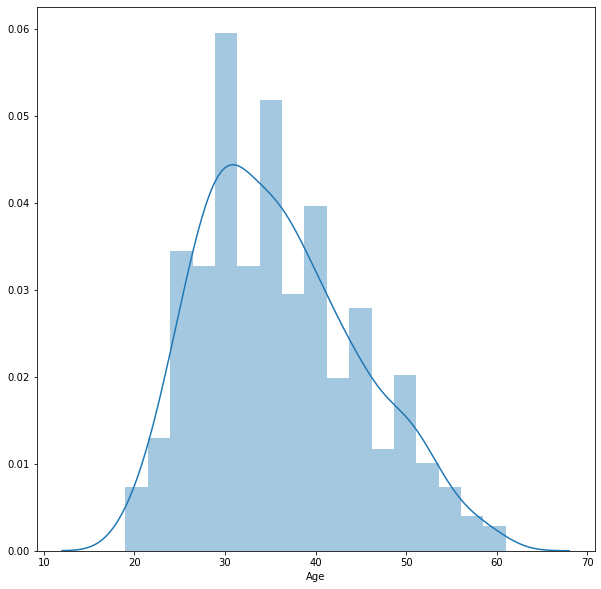

In [27]:
plt.figure(figsize = (10,10))

sns.distplot(visitors['Age'], kde = True);

#### Aufgabe

Erstellen Sie einen Jointplot, der "Area Income" mit "Age" vergleicht.

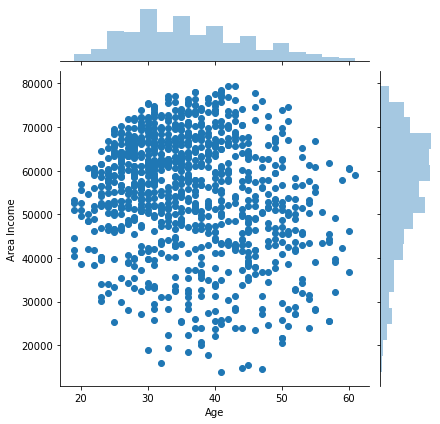

In [28]:
sns.jointplot(x='Age', y='Area Income', data=visitors)


#### Aufgabe

Erstellen Sie einen Jointplot, der die KDE-Verteilung von "Daily Time Spent on Site" gegen "Age" aufzeichnet.

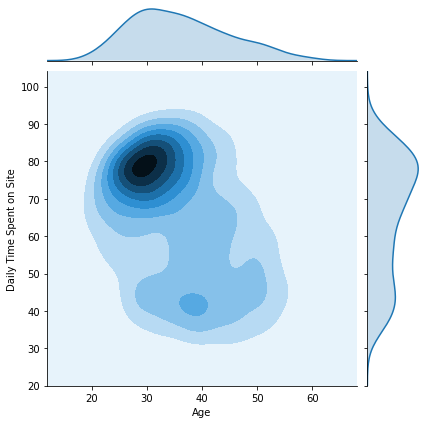

In [29]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=visitors, kind='kde')

#### Aufgabe

Erstellen Sie ähnliche weitere Plots nach eigenem Ermessen.

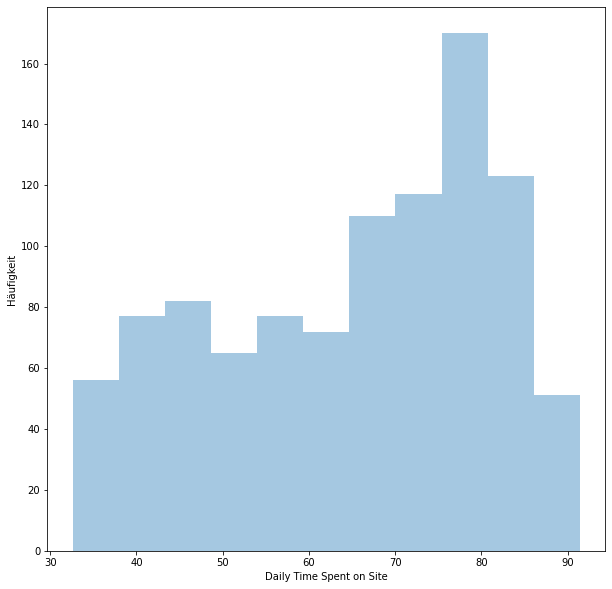

In [30]:
plt.figure(figsize = (10,10))

fig = sns.distplot(visitors['Daily Time Spent on Site'], kde = False)
fig.set(xlabel='Daily Time Spent on Site', ylabel='Häufigkeit');

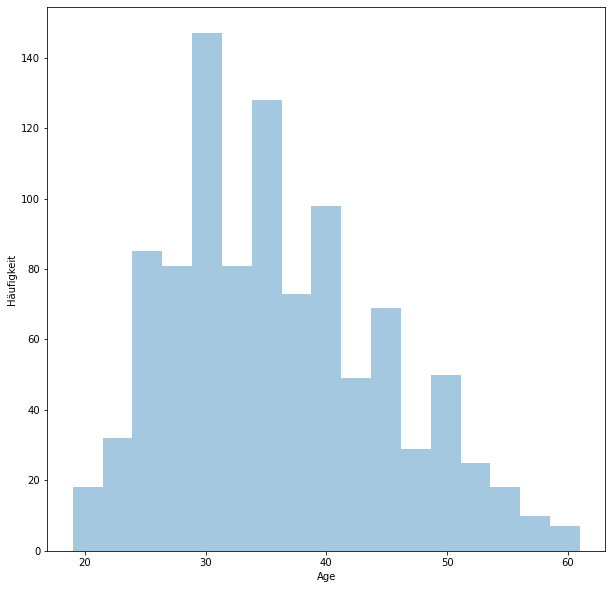

In [31]:
plt.figure(figsize = (10,10))

fig = sns.distplot(visitors['Age'], kde = False)
fig.set(xlabel='Age', ylabel='Häufigkeit');

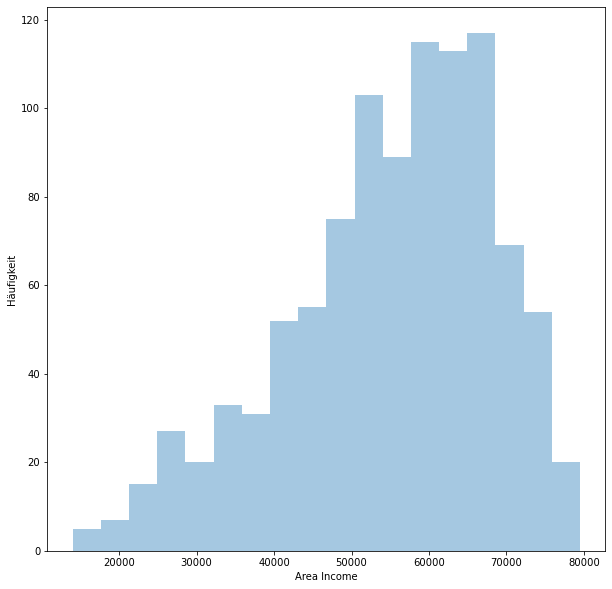

In [32]:
plt.figure(figsize = (10,10))

fig = sns.distplot(visitors['Area Income'], kde = False)
fig.set(xlabel='Area Income', ylabel='Häufigkeit');

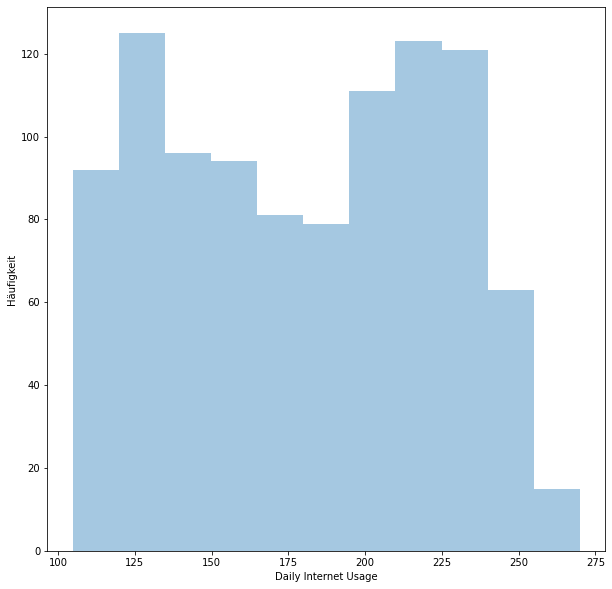

In [33]:
plt.figure(figsize = (10,10))

fig = sns.distplot(visitors['Daily Internet Usage'], kde = False)
fig.set(xlabel='Daily Internet Usage', ylabel='Häufigkeit');


<Figure size 720x720 with 0 Axes>

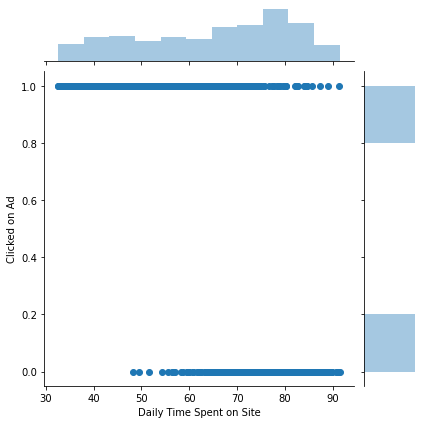

In [34]:
plt.figure(figsize = (10, 10))

sns.jointplot(x = "Daily Time Spent on Site", y = "Clicked on Ad", data = visitors);

<Figure size 720x720 with 0 Axes>

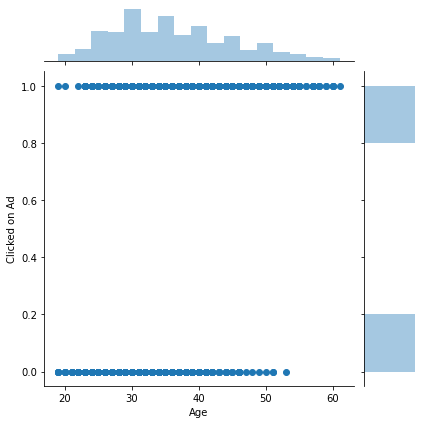

In [35]:
plt.figure(figsize = (10, 10))

sns.jointplot(x = "Age", y = "Clicked on Ad", data = visitors);

<Figure size 720x720 with 0 Axes>

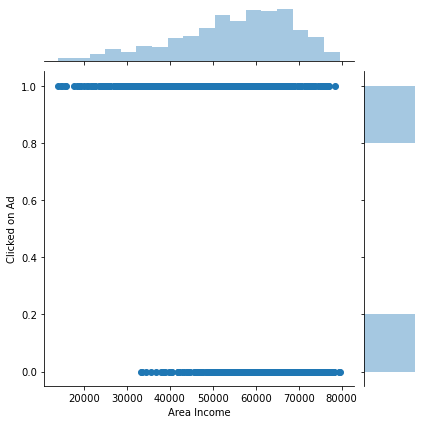

In [36]:
plt.figure(figsize = (10, 10))

sns.jointplot(x = "Area Income", y = "Clicked on Ad", data = visitors);

<Figure size 720x720 with 0 Axes>

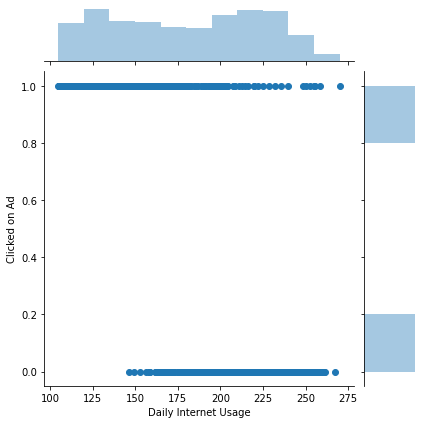

In [37]:
plt.figure(figsize = (10, 10))

sns.jointplot(x = "Daily Internet Usage", y = "Clicked on Ad", data = visitors);

#### Aufgabe

Erstellen Sie für das gesamte DataFrame einen Pairplot, wobei Sie die Labels für die Farbgebung verwenden.

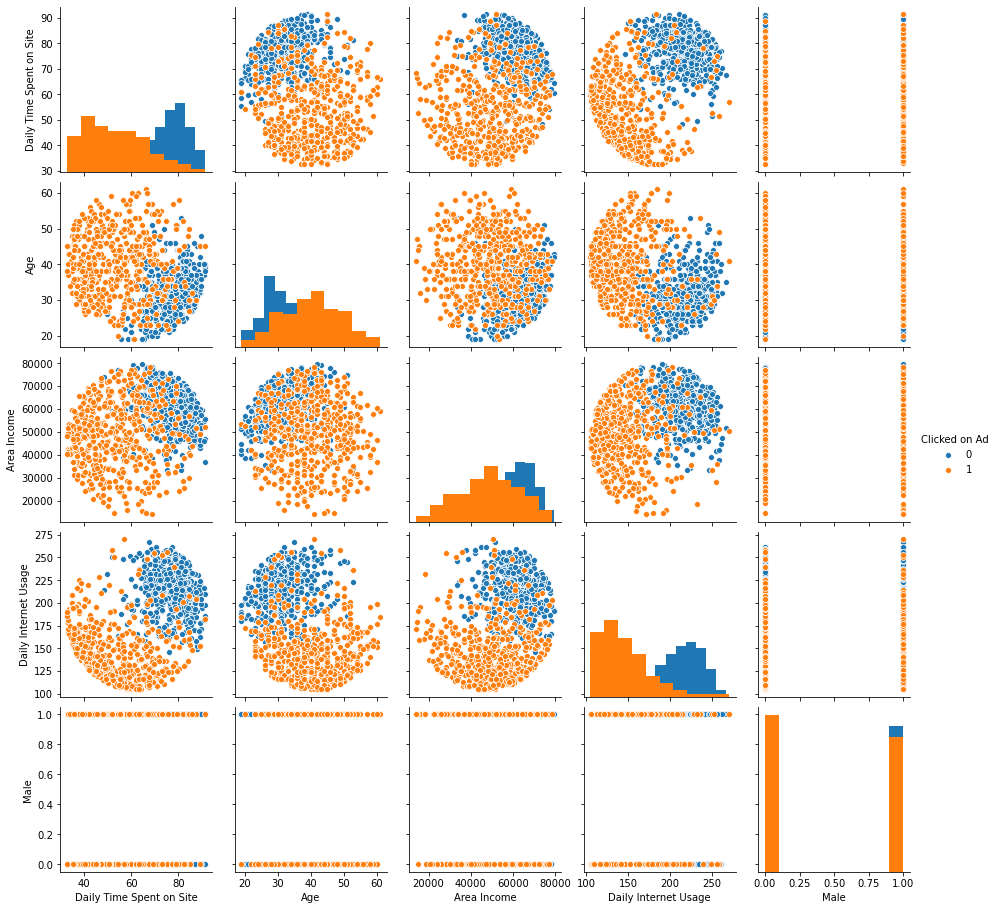

In [38]:
sns.pairplot(data=visitors, hue='Clicked on Ad', diag_kind='hist')

#### Aufgabe

Erzeugen Sie eine Korrelationsmatrix auf Basis einer Heatmap. Bedenken Sie bitte, dass nominale Merkmale dabei Probleme machen. Sie können die betreffenden Merkmale vorübergehend aus dem DataFrame entfernen.

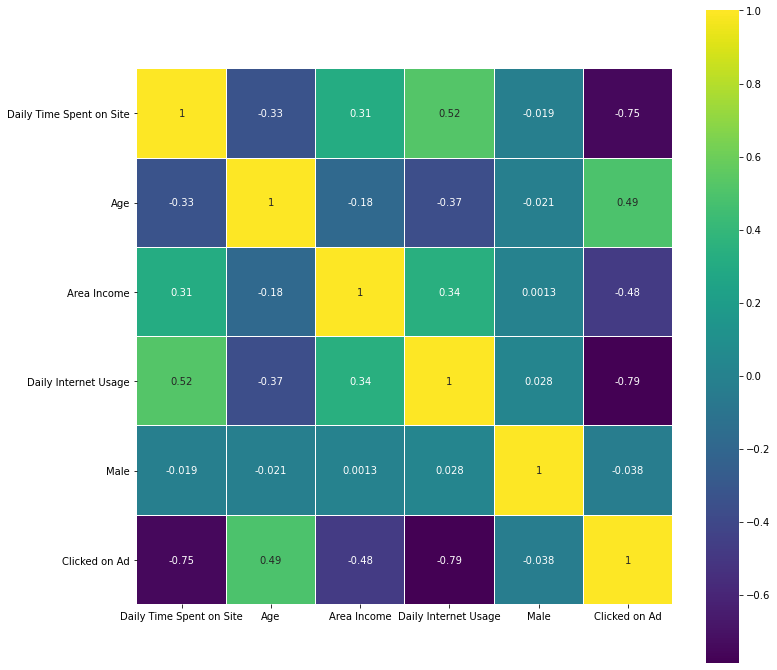

In [39]:
visitors_num = visitors.drop(['Ad Topic Line','City','Country','Timestamp', 'Generation'],axis=1)
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
sns.heatmap(visitors_num.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

### Feature Selection

#### Aufgabe

Wählen Sie auf Basis der Exploration nun die Merkmale aus, die Sie in Ihre Untersuchen einbeziehen wollen.

Daily Internet Usage/Daily Time Spent on Site  --> Clicked on Ad

In [9]:
X = visitors[['Daily Time Spent on Site','Daily Internet Usage']].values
Y = visitors['Clicked on Ad'].values
XX = X.reshape((-1,2))
YY = Y.reshape((-1,1))

### Vorbereiten der Daten

#### Aufgabe

Teilen Sie Ihre Daten in Trainings- und Testset auf. Eine Cross-Validation findet nicht statt. Auch eine Standardisierung ist nicht nötig.

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size = 0.2, random_state=42)
Y_train = Y_train.reshape((-1,))

### Training des Modells

#### Aufgabe

Wählen Sie nun Ihr Modell aus und führen die notwendigen Importe durch. Es soll eine logistische Regression durchgfeührt werden, wobei nur ein linearer Classifier zum Einsatz kommen soll. Sie können also von einer nicht-gekrümmten Decision Boundary ausgehen.

In [18]:
model = logit()

#### Aufgabe

Trainieren Sie Ihr Modell.

In [19]:
model.fit(X_train, Y_train)

LogisticRegression()

### Validierung und Auswertung

#### Aufgabe

Wenden Sie nun Ihr Modell auf die Testdaten an und erzeugen sich Vorhersagen. Legen Sie die Vorhersagen am besten in einer Variablen ab.

In [20]:
yp = model.predict(X_train)
yp_test = model.predict(X_test)

#### Aufgabe

Erzeugen Sie sich einen Klassifikationsreport, um Ihr Modell zu validieren.

In [21]:
model.score(X_test, Y_test)

0.925

In [22]:
accuracy_score(yp_test, Y_test)

0.925

In [23]:
print(classification_report(yp_test, Y_test))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        92
           1       0.92      0.94      0.93       108

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



#### Aufgabe

Untersuchen Sie nun die Klassifikation visuell, indem Sie mehrere Plots erstellen, mit denen Sie die verschiedenen Merkmale gegeneinander untersuchen (2D-Plots!!!!). Nutzen Sie das Modul **Plot-Classifier** (helper.py), um sich in diesen Scatterplots die **Decision Boundary** einzeichnen zu lassen.

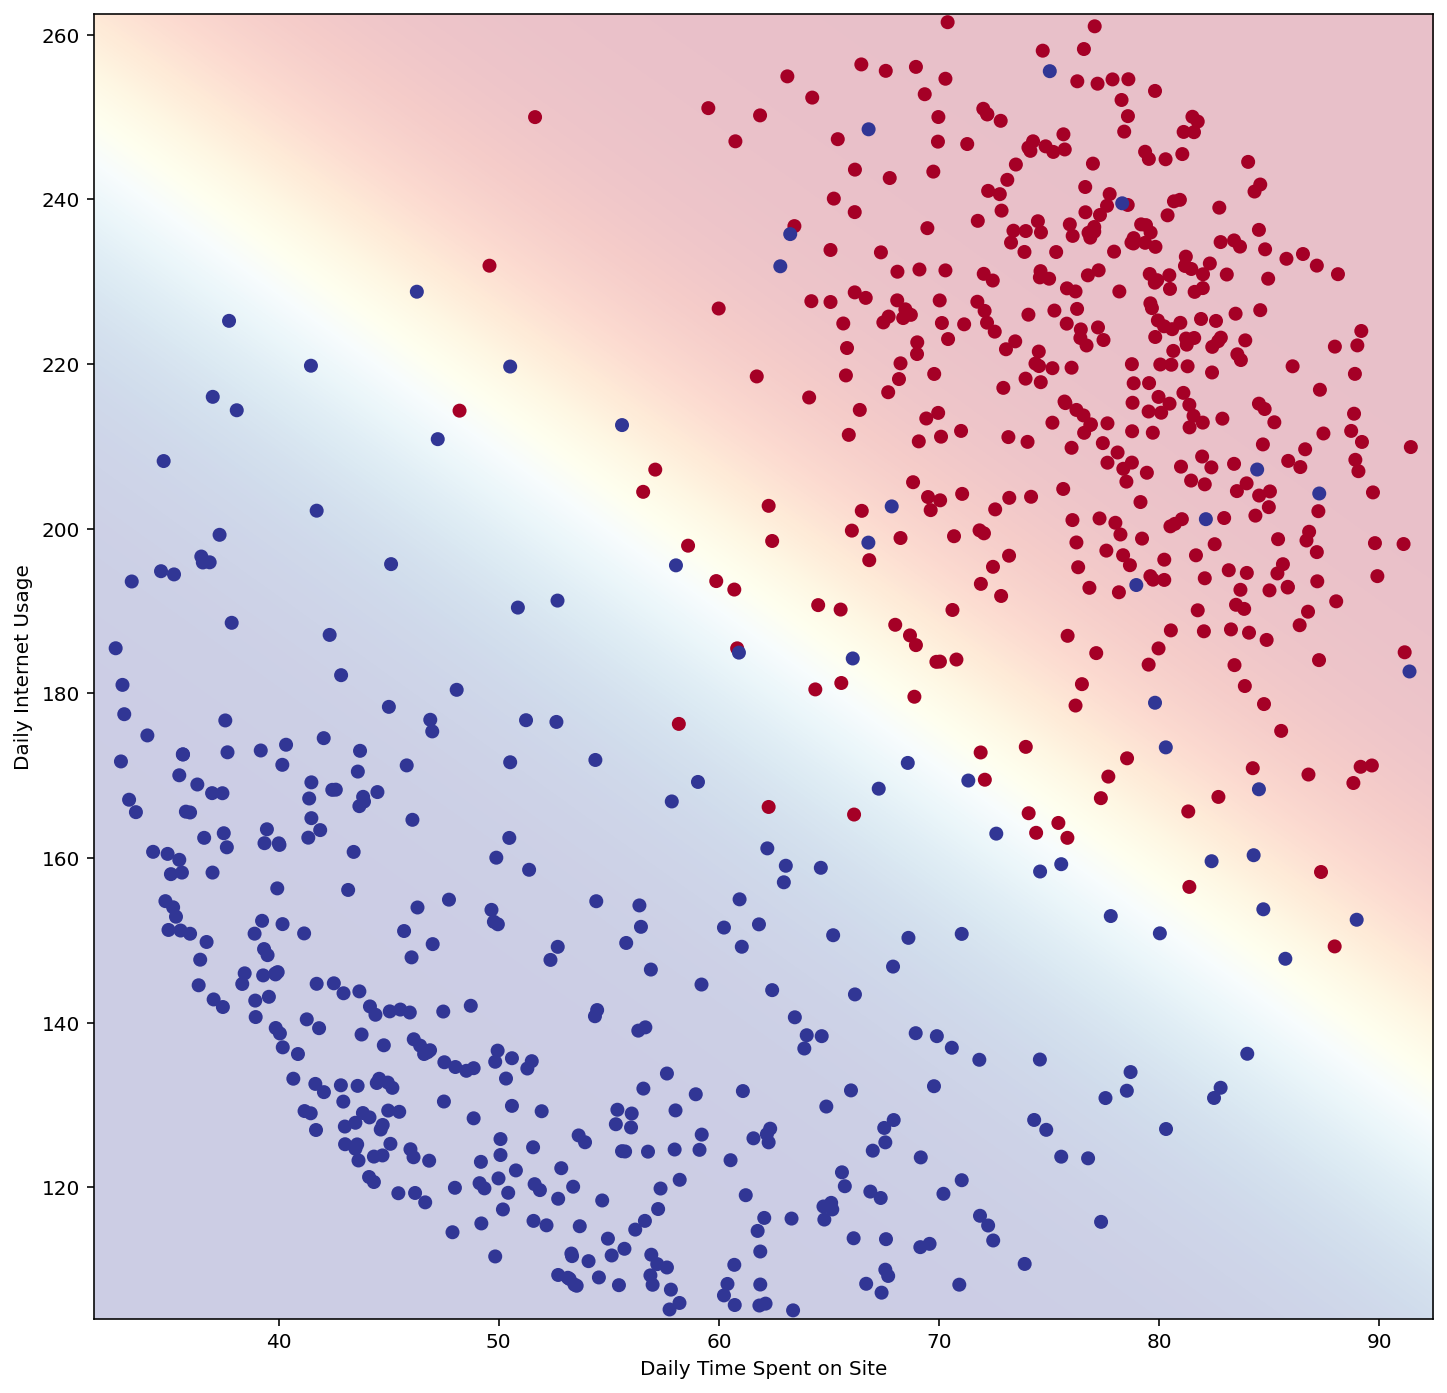

In [46]:
plt.figure(figsize=(12,12))
pc(model, X_train, Y_train, xlabel='Daily Time Spent on Site', ylabel='Daily Internet Usage', proba=True)

### <u>Präsentation:</u> Schlussfolgerungen und Empfehlungen

Nachdem Sie Ihre Untersuchung erfolgreich abgeschlossen haben, müssen Sie sich Gedanken machen, welche Lehren Sie daraus ziehen ("Lessons learned").

#### Aufgabe

Beraten Sie Ihren Auftraggeber:
- Was haben Sie im Laufe der Untersuchung festgestellt?
- Was können Sie über die kritischen Nutzereigenschaften aussagen?
- Welche Merkmalsausprägungen führen zu Clicks?
- Was können Sie für die Zukunft empfehlen, d.h.
- Welche Veränderungen sollten vorgenommen werden?

### 1D Daily Time Spent on Site

In [52]:
X1 = visitors[['Daily Time Spent on Site']].values
Y1 = visitors['Clicked on Ad'].values
XX1 = X1.reshape((-1,1))
YY1 = Y1.reshape((-1,1))

X1_train, X1_test, Y1_train, Y1_test = train_test_split(XX1, YY1, test_size = 0.2, random_state=42)
Y1_train = Y1_train.reshape((-1,))

model1 = logit()
model1.fit(X1_train, Y1_train)

model1.score(X1_test, Y1_test)

0.87

In [81]:
yp1 = model1.predict(X1_train)
yp1_test = model1.predict(X1_test)

print(classification_report(yp1_test, Y1_test))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        99
           1       0.84      0.92      0.88       101

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



### 1D Daily Internet Usage

In [51]:
X2 = visitors[['Daily Internet Usage']].values
Y2 = visitors['Clicked on Ad'].values
XX2 = X2.reshape((-1,1))
YY2 = Y2.reshape((-1,1))

X2_train, X2_test, Y2_train, Y2_test = train_test_split(XX2, YY2, test_size = 0.2, random_state=42)
Y2_train = Y2_train.reshape((-1,))

model2 = logit()
model2.fit(X2_train, Y2_train)

model2.score(X2_test, Y2_test)

0.825

### 1D Age

In [53]:
X3 = visitors[['Age']].values
Y3 = visitors['Clicked on Ad'].values
XX3 = X3.reshape((-1,1))
YY3 = Y3.reshape((-1,1))

X3_train, X3_test, Y3_train, Y3_test = train_test_split(XX3, YY3, test_size = 0.2, random_state=42)
Y3_train = Y3_train.reshape((-1,))

model3 = logit()
model3.fit(X3_train, Y3_train)

model3.score(X3_test, Y3_test)

0.75

### 1D Area Income

In [54]:
X4 = visitors[['Area Income']].values
Y4 = visitors['Clicked on Ad'].values
XX4 = X4.reshape((-1,1))
YY4 = Y4.reshape((-1,1))

X4_train, X4_test, Y4_train, Y4_test = train_test_split(XX4, YY4, test_size = 0.2, random_state=42)
Y4_train = Y4_train.reshape((-1,))

model4 = logit()
model4.fit(X4_train, Y4_train)

model4.score(X4_test, Y4_test)

0.445

Text(0, 0.5, 'Clicked on Ad')

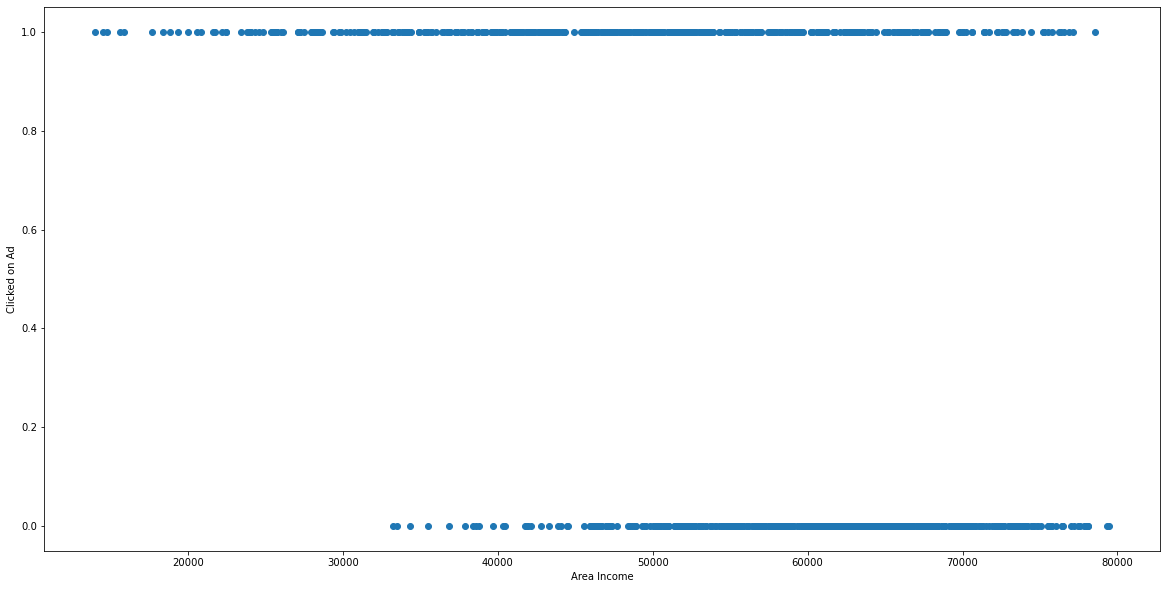

In [18]:
plt.figure(figsize=(20,10))
plt.scatter(visitors['Area Income'], visitors['Clicked on Ad'])
plt.xlabel('Area Income')
plt.ylabel('Clicked on Ad')

## 2D Area; Age

In [7]:
X5 = visitors[['Area Income', 'Age']].values
Y5 = visitors['Clicked on Ad'].values
XX5 = X5.reshape((-1,2))
YY5 = Y5.reshape((-1,1))

X5_train, X5_test, Y5_train, Y5_test = train_test_split(XX5, YY5, test_size = 0.2, random_state=42)
Y5_train = Y5_train.reshape((-1,))

model5 = logit()
model5.fit(X5_train, Y5_train)

model5.score(X5_test, Y5_test)

0.78

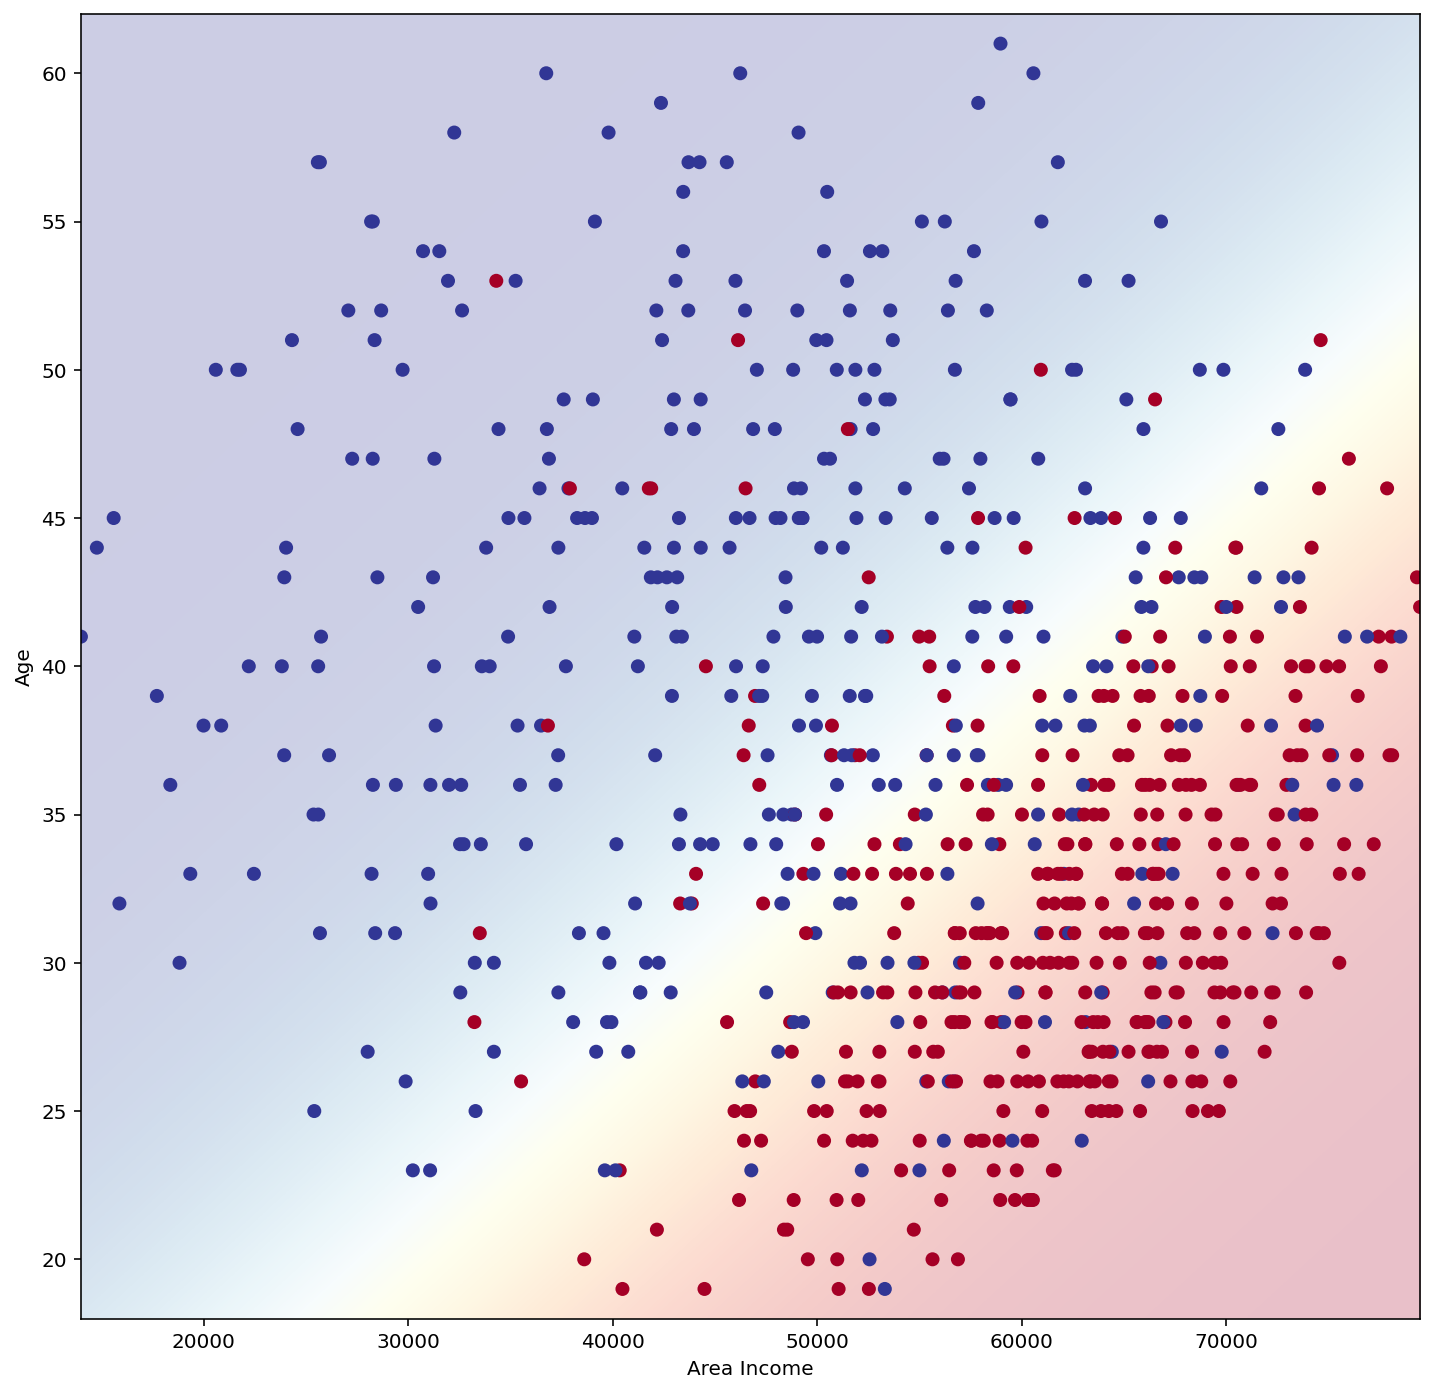

In [47]:
plt.figure(figsize=(12,12))
pc(model5, X5_train, Y5_train, xlabel='Area Income', ylabel='Age', proba=True)

## 2D Area /Usage

ModelScore: 0.63


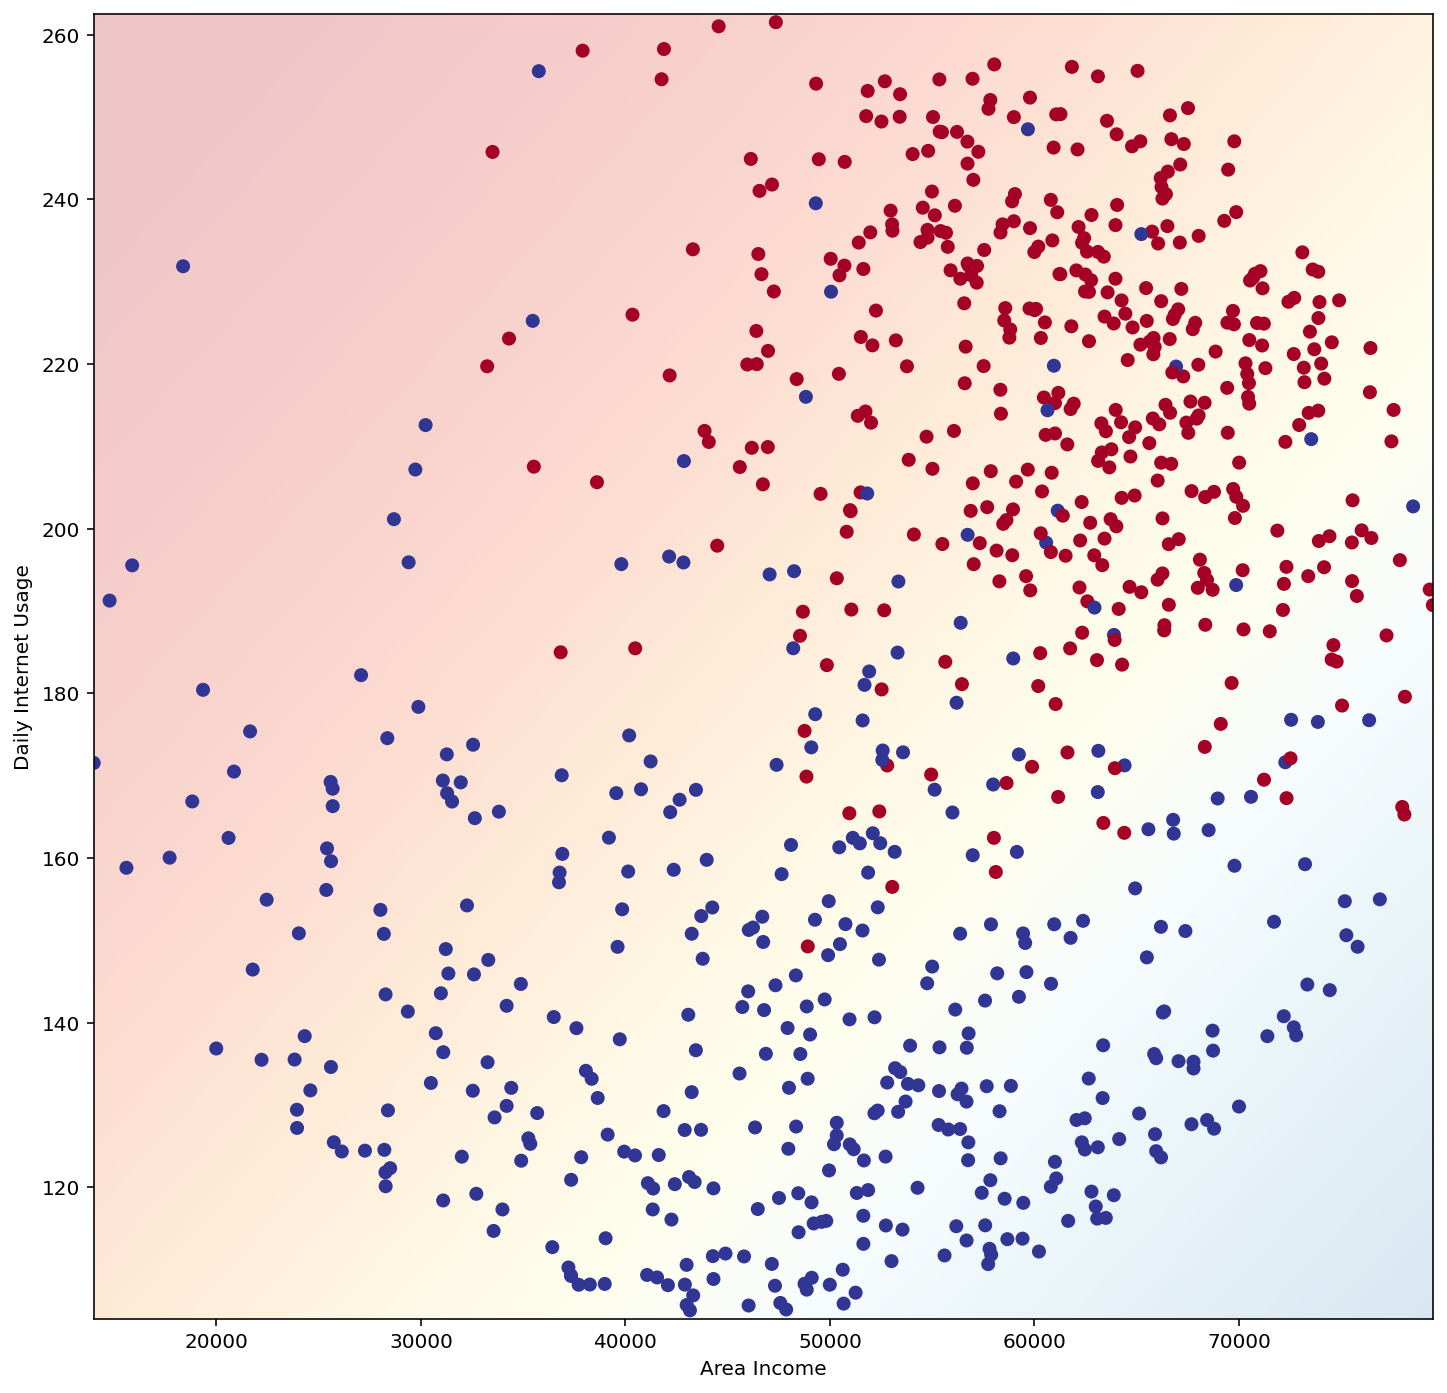

In [48]:
X6 = visitors[['Area Income', 'Daily Internet Usage']].values
Y6 = visitors['Clicked on Ad'].values
XX6 = X6.reshape((-1,2))
YY6 = Y6.reshape((-1,1))

X6_train, X6_test, Y6_train, Y6_test = train_test_split(XX6, YY6, test_size = 0.2, random_state=42)
Y6_train = Y6_train.reshape((-1,))

model6 = logit()
model6.fit(X6_train, Y6_train)

print("ModelScore:", model6.score(X6_test, Y6_test))

plt.figure(figsize=(12,12))
pc(model6, X6_train, Y6_train, xlabel='Area Income', ylabel='Daily Internet Usage', proba=True)

## 2D Area / Spent

ModelScore: 0.655


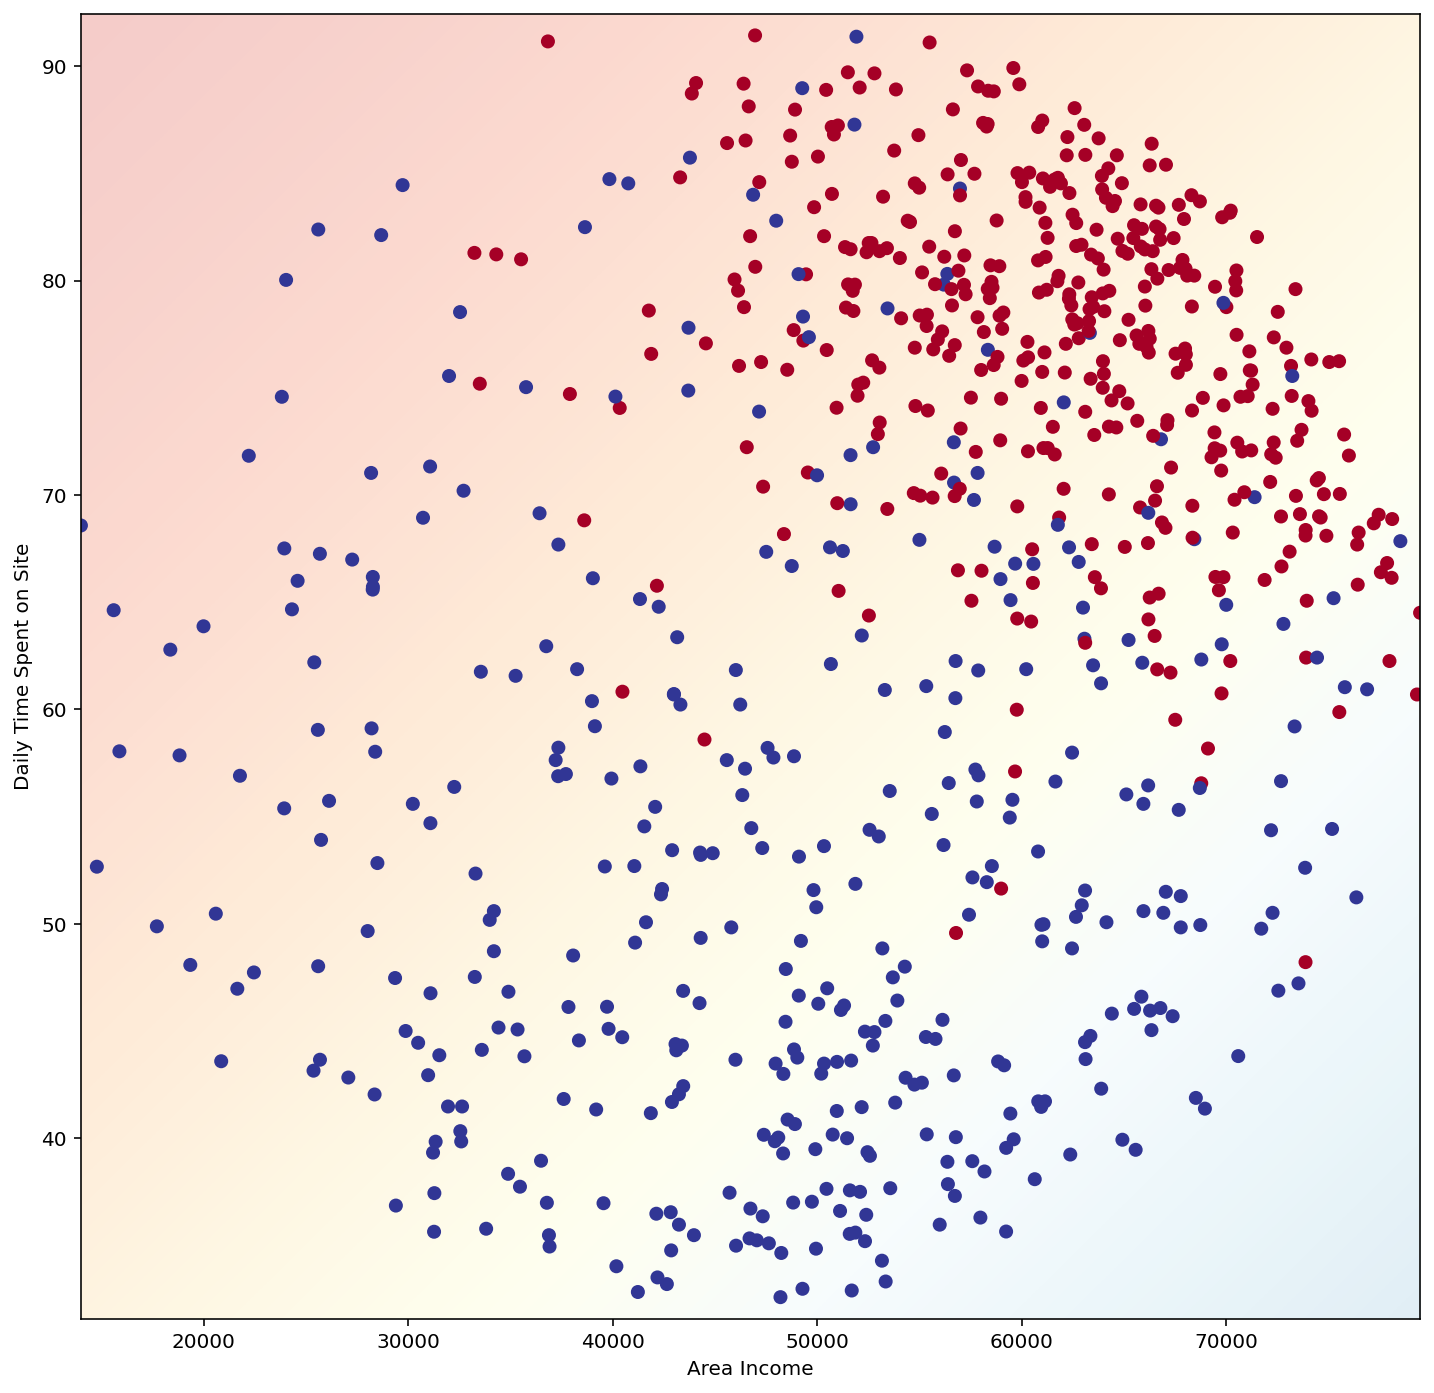

In [50]:
X7 = visitors[['Area Income', 'Daily Time Spent on Site']].values
Y7 = visitors['Clicked on Ad'].values
XX7 = X7.reshape((-1,2))
YY7 = Y7.reshape((-1,1))

X7_train, X7_test, Y7_train, Y7_test = train_test_split(XX7, YY7, test_size = 0.2, random_state=42)
Y7_train = Y7_train.reshape((-1,))

model7 = logit()
model7.fit(X7_train, Y7_train)

print("ModelScore:", model7.score(X7_test, Y7_test))

plt.figure(figsize=(12,12))
pc(model7, X7_train, Y7_train, xlabel='Area Income', ylabel='Daily Time Spent on Site', proba=True)

## 2D Age/Usage

ModelScore: 0.855


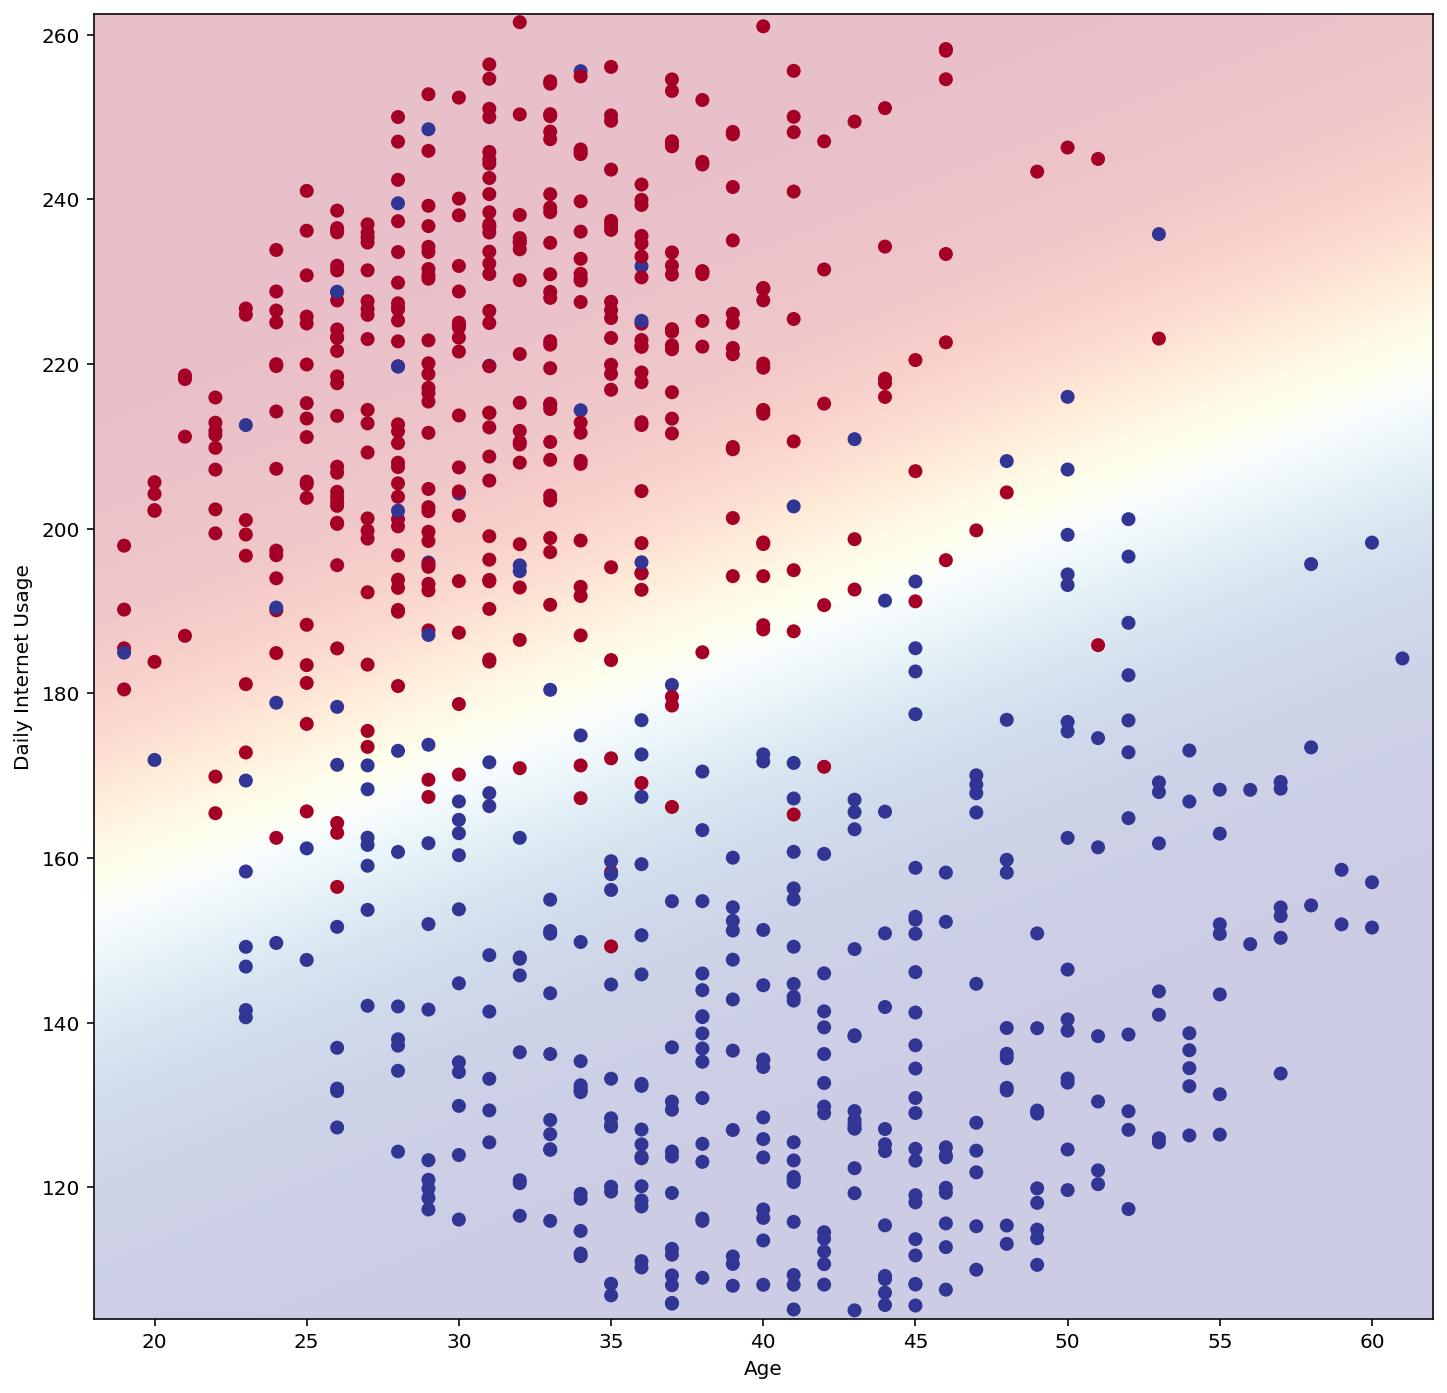

In [52]:
X8 = visitors[['Age', 'Daily Internet Usage']].values
Y8 = visitors['Clicked on Ad'].values
XX8 = X8.reshape((-1,2))
YY8 = Y8.reshape((-1,1))

X8_train, X8_test, Y8_train, Y8_test = train_test_split(XX8, YY8, test_size = 0.2, random_state=42)
Y8_train = Y8_train.reshape((-1,))

model8 = logit()
model8.fit(X8_train, Y8_train)

print("ModelScore:", model8.score(X8_test, Y8_test))

plt.figure(figsize=(12,12))
pc(model8, X8_train, Y8_train, ylabel='Daily Internet Usage', xlabel='Age', proba=True)

## 2D Age/Spent

ModelScore: 0.925


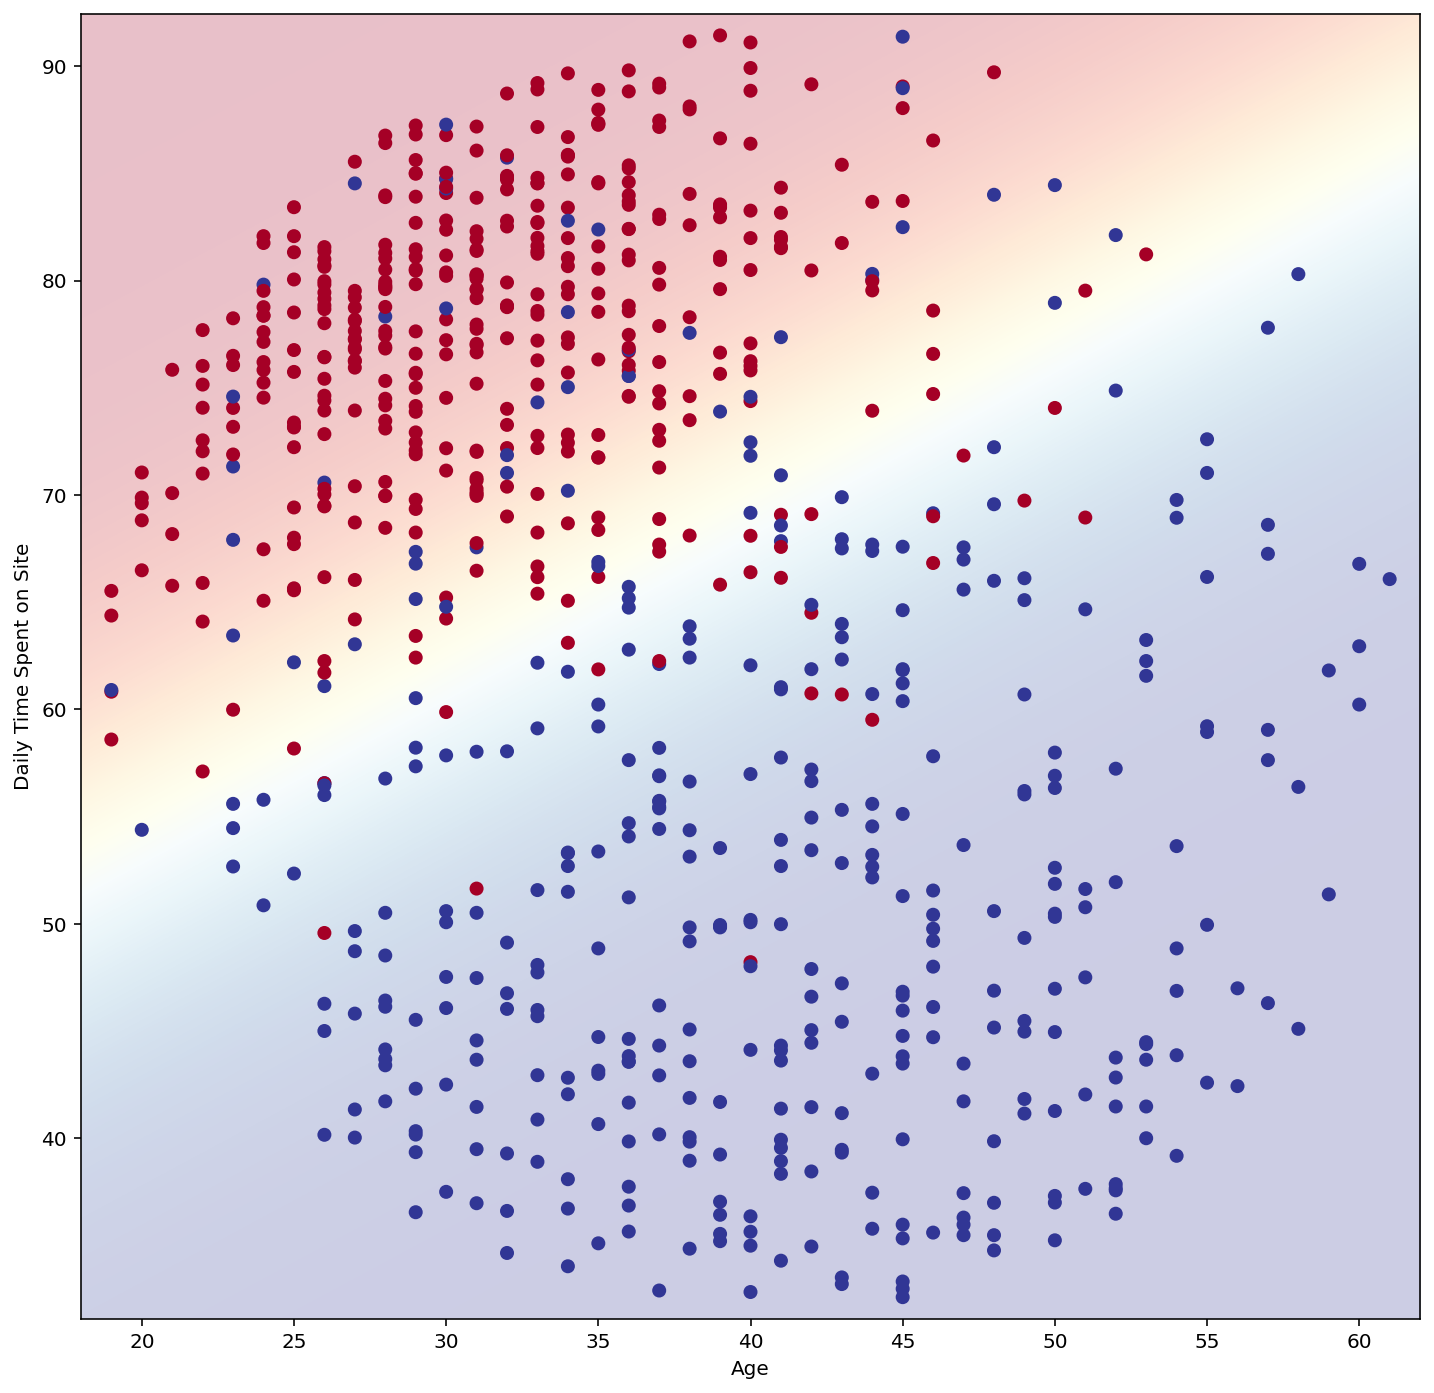

In [53]:
X9 = visitors[['Age', 'Daily Time Spent on Site']].values
Y9 = visitors['Clicked on Ad'].values
XX9 = X9.reshape((-1,2))
YY9 = Y9.reshape((-1,1))

X9_train, X9_test, Y9_train, Y9_test = train_test_split(XX9, YY9, test_size = 0.2, random_state=42)
Y9_train = Y9_train.reshape((-1,))

model9 = logit()
model9.fit(X9_train, Y9_train)
yp9 = model9.predict(X9_train)
yp9_test = model9.predict(X9_test)

print("ModelScore:", model9.score(X9_test, Y9_test))

plt.figure(figsize=(12,12))
pc(model9, X9_train, Y9_train, xlabel='Age', ylabel='Daily Time Spent on Site', proba=True)

## 3D Age/Usage/Spent

In [77]:
X3d = visitors[['Age', 'Daily Internet Usage', 'Daily Time Spent on Site']].values
Y3d = visitors['Clicked on Ad'].values
XX3d = X3d.reshape((-1,3))
YY3d = Y3d.reshape((-1,1))

X3d_train, X3d_test, Y3d_train, Y3d_test = train_test_split(XX3d, YY3d, test_size = 0.2, random_state=42)
Y3d_train = Y3d_train.reshape((-1,))

model3d = logit()
model3d.fit(X3d_train, Y3d_train)

print("ModelScore:", model3d.score(X3d_test, Y3d_test))


ModelScore: 0.93


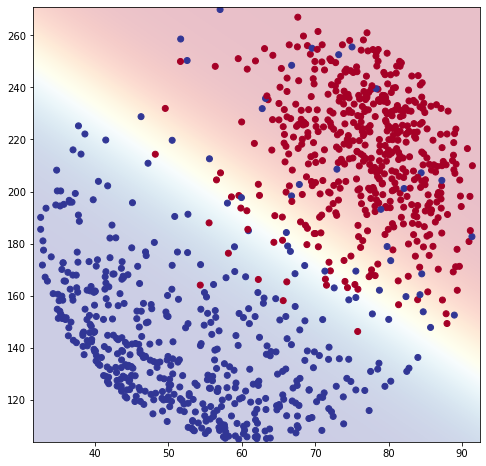

In [89]:
plt.figure(figsize=(8,8))
pc(model, XX, YY, proba=True)

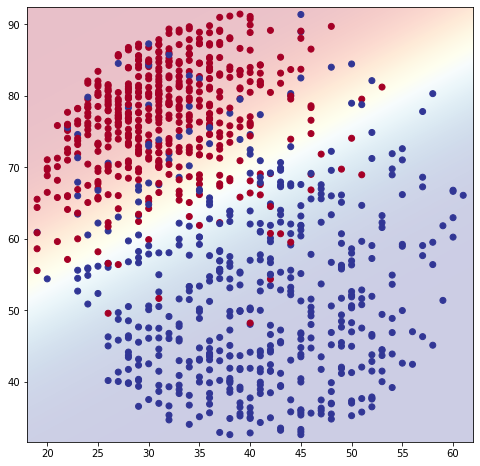

In [88]:
plt.figure(figsize=(8,8))
pc(model9, XX9, YY9, proba=True)

## Crossvalidation Model/Model9

In [43]:
kf = KFold(n_splits = 10)

YYi = YY.reshape(-1,)
YY9i = YY9.reshape(-1,)

cv_scores = cross_val_score(model, XX, YYi, cv = kf)
cv_scores9 = cross_val_score(model9, XX9, YY9i, cv = kf)


print("CV Score für Model 'Time Spent/Internet Usage'", np.mean(cv_scores), cv_scores)
print("CV Score für Model 'Age/Internet Usage'", np.mean(cv_scores9), cv_scores9)

CV Score für Model 'Time Spent/Internet Usage' 0.951 [0.98 0.93 0.96 0.98 0.94 0.96 0.97 0.9  0.97 0.92]
CV Score für Model 'Age/Internet Usage' 0.898 [0.93 0.86 0.88 0.88 0.91 0.89 0.93 0.87 0.93 0.9 ]


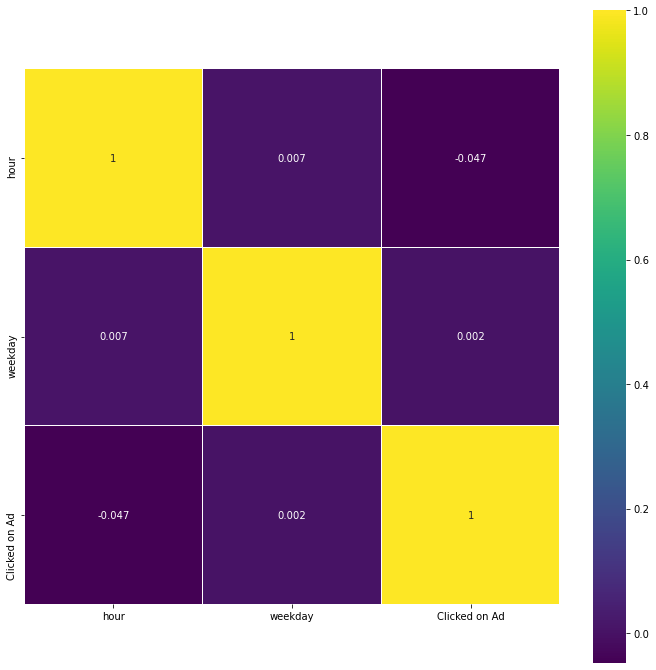

In [93]:
colormap = plt.cm.viridis
plt.figure(figsize=(12, 12))
sns.heatmap(visitors_time.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

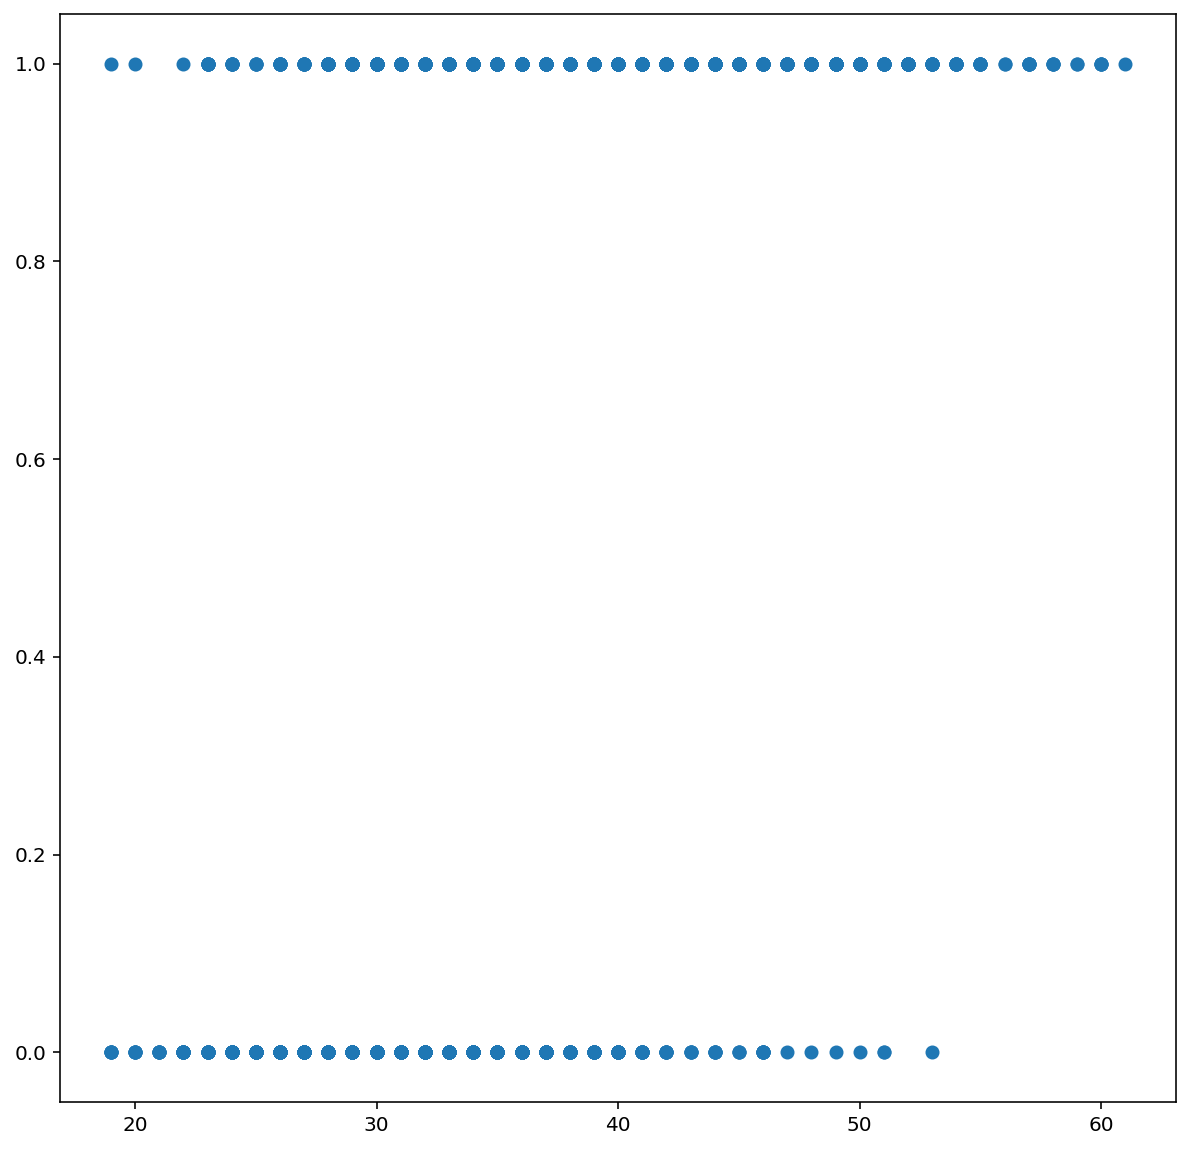

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(visitors['Age'], visitors['Clicked on Ad'])

### Multivariable Regression 

In [37]:
Xb = visitors[['Age', 'Daily Internet Usage', 'Daily Time Spent on Site']].values
Yb = visitors['Clicked on Ad'].values
XXb = Xb.reshape((-1,3))
Xb = sm.add_constant(Xb)


In [38]:
model123 = sm.Logit(Yb, XXb)
result = model123.fit(method='newton')
result.params

Optimization terminated successfully.
         Current function value: 0.256425
         Iterations 7


array([ 0.25473989, -0.02595713, -0.06588117])

In [39]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Thu, 12 Nov 2020   Pseudo R-squ.:                  0.6301
Time:                        15:27:54   Log-Likelihood:                -256.42
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                2.157e-190
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2547      0.016     15.910      0.000       0.223       0.286
x2            -0.0260      0.003     -9.117      0.000      -0.032      -0.020
x3            -0.0659      0.008     -8.302      0.000      -0.081      -0.050
==============================================================================
"""

In [40]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.630      
Dependent Variable: y                AIC:              518.8498   
Date:               2020-11-12 15:27 BIC:              533.5731   
No. Observations:   1000             Log-Likelihood:   -256.42    
Df Model:           2                LL-Null:          -693.15    
Df Residuals:       997              LLR p-value:      2.1574e-190
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
---------------------------------------------------------------------
        Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
---------------------------------------------------------------------
x1      0.2547      0.0160    15.9099    0.0000     0.2234     0.2861
x2     -0.0260      0.0028    -9.1165    0.0000    -0.0315    -0.0204
x3     -0.0659      0.0079    -8.3023    0.0000    -0.0814    -0.0503
==================================================================

"""

### <u>Präsentation:</u> Schlussfolgerungen und Empfehlungen

Nachdem Sie Ihre Untersuchung erfolgreich abgeschlossen haben, müssen Sie sich Gedanken machen, welche Lehren Sie daraus ziehen ("Lessons learned").

Beraten Sie Ihren Auftraggeber:
- Was haben Sie im Laufe der Untersuchung festgestellt?
- Was können Sie über die kritischen Nutzereigenschaften aussagen?
- Welche Merkmalsausprägungen führen zu Clicks?
- Was können Sie für die Zukunft empfehlen, d.h.
- Welche Veränderungen sollten vorgenommen werden?

1) Viele variablen laben kein oder kleinen Einfluss auf der Klickrate wie Geschlecht, Einkommen, Wohnort 

2+3) Negativer Zusammenhang zwischen Alter und Klick rate = ältere Menschen Klicken mehr als jüngere
   Je lange die Menschen auf der der Webseite belieben verringert sich die Neigung auf Ads zu klicken
   Je langer man den Internet nutzt desto unwahrscheinlicher ist es auf ein Ad zu klicken 
4) Man soll die Werbekampagne eher für die Jugendlichen attraktiver machen, denn die Alten klicken auf alles möglicher und es      mehr jugendlicher Nutzer gibt als die Älteren. Die Werbung soll kürze gemacht werden. Je lange man die Werbungschaut desto unwahrscheinlicher, dass er auf die klickt. 

5) Die Werbung sollte mehr spezifiziert werden. Jeder Titel ist einzelartig. Die Kampagne soll klar darstellen was angeboten wird.  
